In [ ]:
# package load
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture

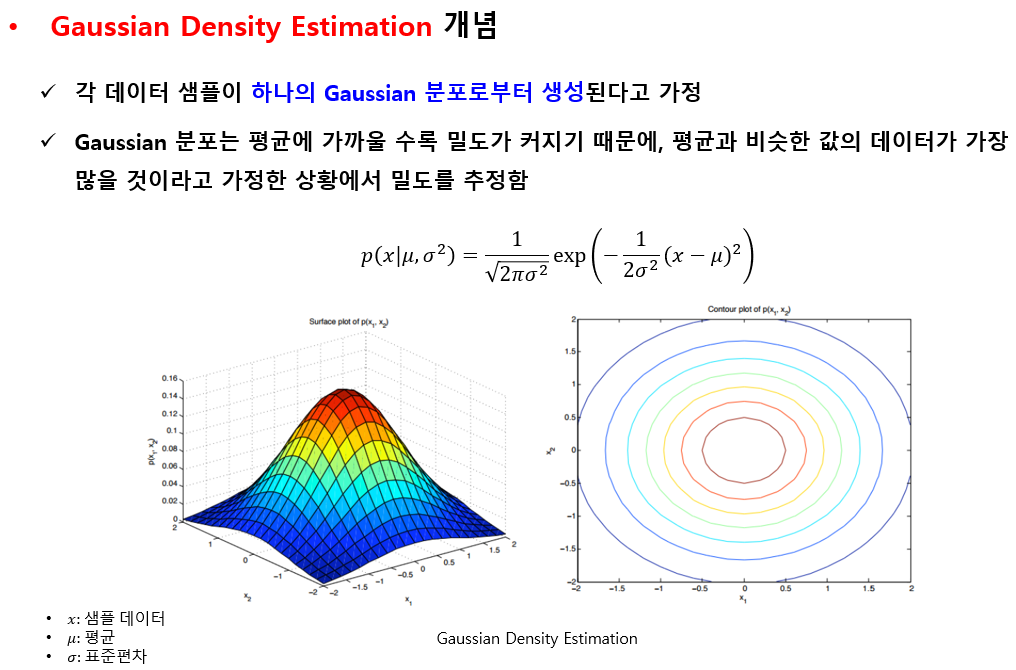

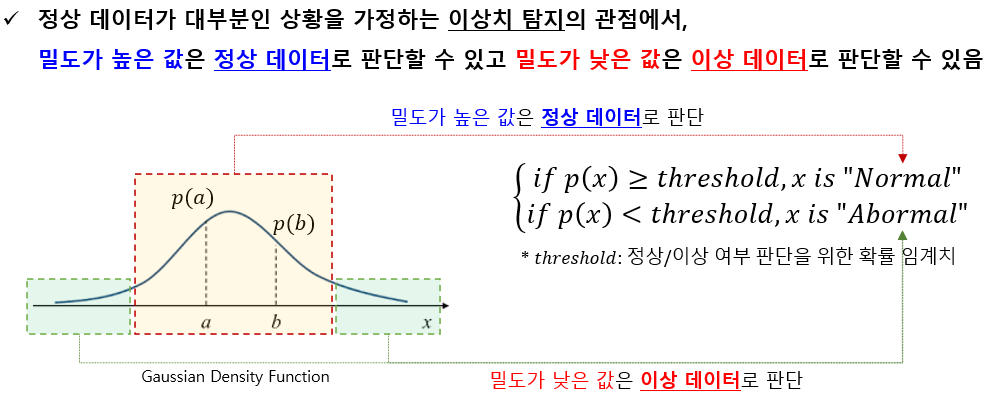

In [ ]:
# Data generation
# make_blobs: 등방성 가우시안 정규분포를 이용해 가상 데이터를 생성
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]

X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [ ]:
print(X[:10])
print(y[:10])

[[ 0.81672911  1.32719052]
 [ 0.28671649  1.30485269]
 [-1.89804675 -0.00869803]
 [ 0.4180268   1.03495115]
 [-2.75596489 -0.16104093]
 [-0.99812949  0.7859593 ]
 [ 0.45794419 -0.27456806]
 [-1.00213694  0.61285026]
 [-1.4568923   1.09995388]
 [-0.14528985  0.47371732]]
[1 1 0 1 0 0 1 0 0 1]


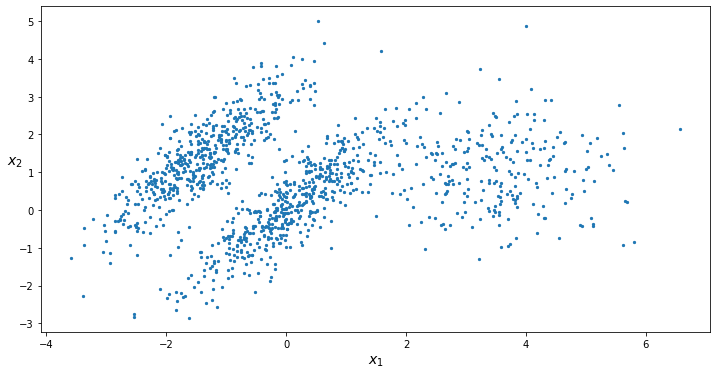

In [ ]:
# data plot
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=5, cmap='autumn')
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    
plt.figure(figsize=(12, 6))
plot_clusters(X)
plt.show()

In [ ]:
# GMM model train
gm = GaussianMixture(n_components=3, n_init=10, random_state=42) # n_components: # of mixture components, n_init: 중심에 대해 서로 다른 시작 위치를 사용하여 전체 알고리즘이 실행되는 횟수
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

In [ ]:
# prediction
labels = gm.predict(X)
print(labels)

[0 0 1 ... 2 2 2]


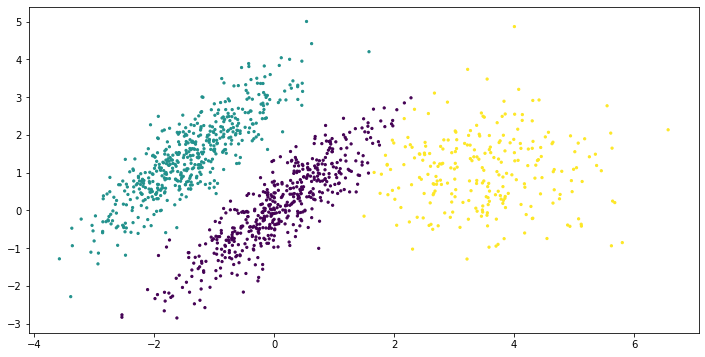

In [ ]:
# visualize the prediction result
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=5, cmap='viridis');

In [ ]:
# model parameters estimated by EM algorithm 
print("Weights: ", gm.weights_) # 군집별 크기 비율

print("\nMeans:\n", gm.means_) # 군집별 평균

print("\nCovariances:\n", gm.covariances_) # 군집별 공분산

Weights:  [0.39025715 0.40007391 0.20966893]

Means:
 [[ 0.05131611  0.07521837]
 [-1.40763156  1.42708225]
 [ 3.39893794  1.05928897]]

Covariances:
 [[[ 0.68799922  0.79606357]
  [ 0.79606357  1.21236106]]

 [[ 0.63479409  0.72970799]
  [ 0.72970799  1.1610351 ]]

 [[ 1.14833585 -0.03256179]
  [-0.03256179  0.95490931]]]


> 공분산


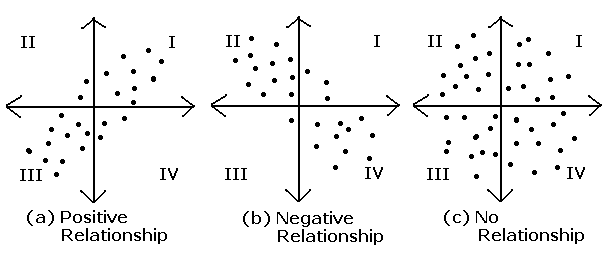

In [ ]:
# run several times, keeping only the best solution
print("Algorithm Convergred: ", gm.converged_)

print("\nNumber of Iterations: ", gm.n_iter_) # Number of initializations to perform. (best results)

Algorithm Convergred:  True

Number of Iterations:  4


In [ ]:
# hard clustering: which cluster each instance belongs to
print("Hard Clustering Prediction: ", gm.predict(X))

# soft clustering: probabilities that it came from each cluster
print("\nSoft Clustering Prediction:\n", gm.predict_proba(X))

Hard Clustering Prediction:  [0 0 1 ... 2 2 2]

Soft Clustering Prediction:
 [[9.76741808e-01 6.78581203e-07 2.32575136e-02]
 [9.82832955e-01 6.76173663e-04 1.64908714e-02]
 [7.46494398e-05 9.99923327e-01 2.02398402e-06]
 ...
 [4.26050456e-07 2.15512941e-26 9.99999574e-01]
 [5.04987704e-16 1.48083217e-41 1.00000000e+00]
 [2.24602826e-15 8.11457779e-41 1.00000000e+00]]


In [ ]:
# samples sequentially from each cluster
X_new, y_new = gm.sample(6)

print("New Samples:\n", X_new)
print("\nLabels of New Samples:\n", y_new)

New Samples:
 [[-0.86944074 -0.32767626]
 [ 0.29836051  0.28297011]
 [-2.8014927  -0.09047309]
 [ 3.98203732  1.49951491]
 [ 3.81677148  0.53095244]
 [ 2.84104923 -0.73858639]]

Labels of New Samples:
 [0 0 1 2 2 2]


In [ ]:
# estimate the log values of the probabilitey density function (PDF)
print("Log of PDF:\n", gm.score_samples(X)) # log-likelihood

Log of PDF:
 [-2.60768954 -3.57110232 -3.32987086 ... -3.51347241 -4.39798588
 -3.80746532]


> Likelihood: 기여도

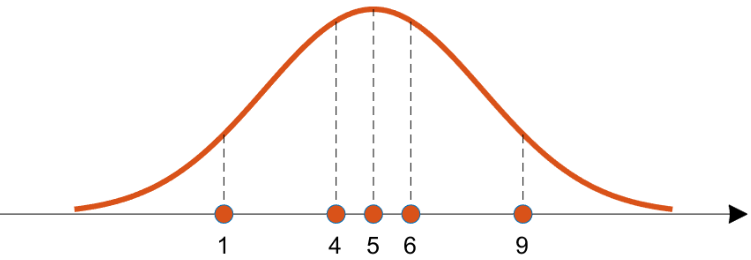

In [ ]:
# PDF 값이 1로 적분되는지에 대한 확인 작업
resolution = 100

grid = np.arange(-10, 10, 1 / resolution)
xx, yy = np.meshgrid(grid, grid)
X_full = np.vstack([xx.ravel(), yy.ravel()]).T # 평평하게 배열

pdf = np.exp(gm.score_samples(X_full))
pdf_probas = pdf * (1 / resolution) ** 2
pdf_probas.sum()

0.9999999999215022

In [ ]:
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    
    # alpha: blending value, between 0 (transparent) and 1 (opaque)
    # zorder: layer 위치
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=5,
                color=cross_color, zorder=11, alpha=1)

In [ ]:
def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0), # for contour color
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

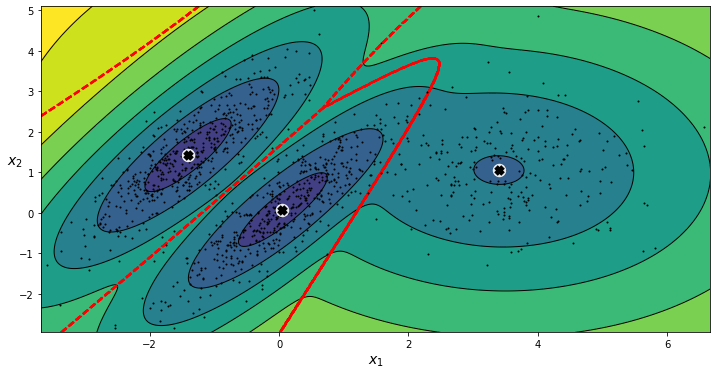

In [ ]:
# visaulize centroids, density, decision boundaries from clusters
plt.figure(figsize=(12, 6))

plot_gaussian_mixture(gm, X)

plt.show()

> Covariance Type

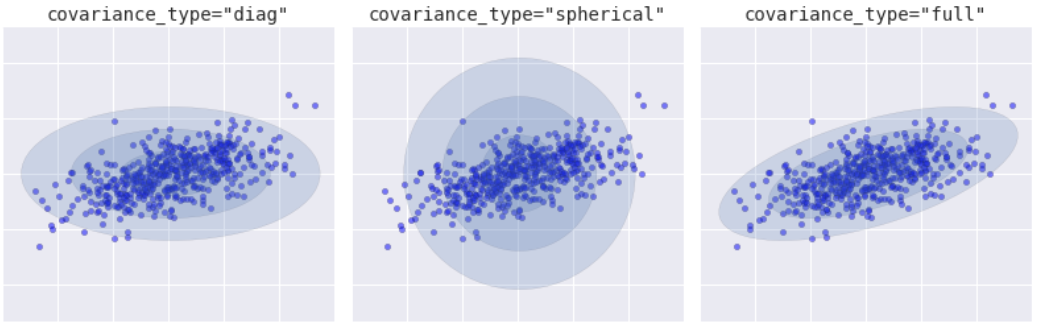

In [ ]:
# GMMs modeling
gm_full = GaussianMixture(n_components=3, n_init=10, covariance_type="full", random_state=42)
gm_tied = GaussianMixture(n_components=3, n_init=10, covariance_type="tied", random_state=42)
gm_spherical = GaussianMixture(n_components=3, n_init=10, covariance_type="spherical", random_state=42)
gm_diag = GaussianMixture(n_components=3, n_init=10, covariance_type="diag", random_state=42)

# model train
gm_full.fit(X)
gm_tied.fit(X)
gm_spherical.fit(X)
gm_diag.fit(X)

GaussianMixture(covariance_type='diag', n_components=3, n_init=10,
                random_state=42)

In [ ]:
def compare_gaussian_mixtures(gm1, gm2, X):
    plt.figure(figsize=(12, 5))

    plt.subplot(121)
    plot_gaussian_mixture(gm1, X)
    plt.title('covariance_type="{}"'.format(gm1.covariance_type), fontsize=14)

    plt.subplot(122)
    plot_gaussian_mixture(gm2, X, show_ylabels=False)
    plt.title('covariance_type="{}"'.format(gm2.covariance_type), fontsize=14)

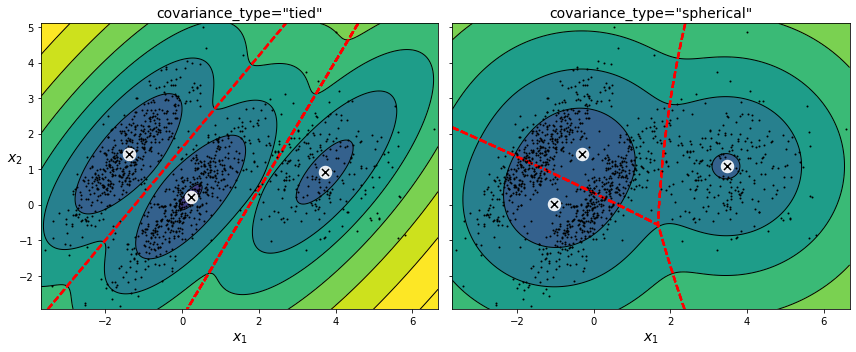

In [ ]:
# visualize the results of gm_tied & gm_spherical
compare_gaussian_mixtures(gm_tied, gm_spherical, X)
plt.tight_layout()
plt.show()

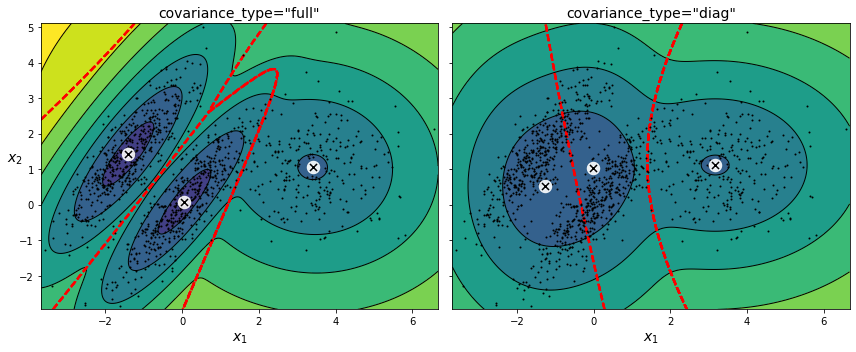

In [ ]:
# visualize the results of gm_full & gm_diag
compare_gaussian_mixtures(gm_full, gm_diag, X)
plt.tight_layout()
plt.show()